# Lab Exercise on Data Exploration and Preparation Summer 2025 ITCS 6162
## Your Name: Blake McCarn

### Using the Boston Building and Property Violations Dataset showing a variety of code violations, perform exploratory data analysis, data wrangling and document what you learn. Execute the code sequentially starting with library imports and continue wherever code is already entered. Follow instructions and add code or text where indicated (Question 1, Question 2, etc.). Feel free to add other code. Turn in your notebook "printed" as a PDF but be sure to Download the .ipynb version as well for continuing work or for saving when complete.
### To learn more about the metadata visit: <a href="https://data.boston.gov/dataset/building-and-property-violations1/resource/800a2663-1d6a-46e7-9356-bedb70f5332c">Boston Building and Property Violations</a><br>

### Review the notebook at <a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb#scrollTo=ahx_HYUqYc9T">Python Data Science Handbook Visualization With Seaborn</a> to assist with the visualizations. You can also use AI to assist with the code, but make sure you understand every line of code!

In [1]:
# import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# create a variable to store the url for the data ingest
urltodata = "https://raw.githubusercontent.com/plthomps/UNCC-Data-Mining-Summer-2025/refs/heads/main/tmpdiixs5mq.csv"

In [3]:
# read the data using the url into a pandas dataframe
bostondata = pd.read_csv(urltodata)

In [4]:
# examine the first few rows of data
bostondata.head()

# Also check the column names
print("\nColumn names in the dataset:")
print(bostondata.columns.tolist())


Column names in the dataset:
['case_no', 'ap_case_defn_key', 'status_dttm', 'status', 'code', 'value', 'description', 'violation_stno', 'violation_sthigh', 'violation_street', 'violation_suffix', 'violation_city', 'violation_state', 'violation_zip', 'ward', 'contact_addr1', 'contact_addr2', 'contact_city', 'contact_state', 'contact_zip', 'sam_id', 'latitude', 'longitude', 'location']


## Question 1 Part A: using code, document the nulls in the dataset.

In [5]:
#Question 1 Part A using code, show the nulls in the dataframe

# Show null counts for each column
print("Null counts by column:")
print(bostondata.isnull().sum())
print("\n")

# Show percentage of nulls for each column
print("Percentage of nulls by column:")
null_percentages = (bostondata.isnull().sum() / len(bostondata)) * 100
print(null_percentages.round(2))
print("\n")

# Show total nulls in the dataset
print(f"Total nulls in dataset: {bostondata.isnull().sum().sum()}")
print(f"Total rows in dataset: {len(bostondata)}")
print("\n")

# Columns with any nulls
cols_with_nulls = bostondata.columns[bostondata.isnull().any()].tolist()
print(f"Columns with null values: {cols_with_nulls}")

Null counts by column:
case_no                 0
ap_case_defn_key        0
status_dttm             1
status                  0
code                    0
value               16782
description           247
violation_stno          0
violation_sthigh    12534
violation_street        0
violation_suffix      144
violation_city          0
violation_state         0
violation_zip           2
ward                    0
contact_addr1           5
contact_addr2       13765
contact_city            2
contact_state           2
contact_zip            13
sam_id                 92
latitude               93
longitude              93
location               93
dtype: int64


Percentage of nulls by column:
case_no               0.00
ap_case_defn_key      0.00
status_dttm           0.01
status                0.00
code                  0.00
value               100.00
description           1.47
violation_stno        0.00
violation_sthigh     74.69
violation_street      0.00
violation_suffix      0.86
violation_

## Question 1 Part B: How would you handle the nulls? In the markdown cell below, document several ways to handle the nulls in the dataset. You are not required to enter code (optional), only describe approaches to handling the nulls.

## Question 1 Part B Answer:

There are several approaches to handle null values in this dataset:

1. **Drop nulls completely** - We could remove all rows with any null values using `dropna()`. However, this might result in significant data loss if many rows have at least one null value.

2. **Drop columns with high null percentages** - If certain columns have a very high percentage of nulls (like over 50%), we might consider dropping those entire columns since they don't provide much useful information.

3. **Fill with appropriate values**:
   - For categorical data (like property_id, street_name): We could fill with "Unknown" or "Missing"
   - For numerical data: We could use mean, median, or mode imputation
   - For location data (latitude/longitude): We might use the neighborhood's average coordinates

4. **Forward/Backward fill** - For time-series related data, we could use the previous or next valid value, especially useful if the data has some temporal ordering.

5. **Keep nulls as is** - For some analyses, null values might be informative (e.g., missing permit numbers might indicate unpermitted work), so we might want to keep them and handle them case-by-case in our analysis.

For this dataset, I'd probably use a combination approach: drop columns with very high null percentages, fill categorical nulls with "Unknown", and keep other nulls for now while being careful to handle them appropriately in each analysis.

In [6]:
#lets add a column - month - and make it numeric
# we will use slice
bostondata['month'] = bostondata['status_dttm'].str.slice(5,7)
#one of the values is not null, but has spaces
bostondata["month"].replace({"": "09"}, inplace=True)
# change the column type from object to int
bostondata['month'] = pd.to_numeric(bostondata['month'])
#lets see info on bostondata
bostondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16782 entries, 0 to 16781
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           16782 non-null  object 
 1   ap_case_defn_key  16782 non-null  int64  
 2   status_dttm       16781 non-null  object 
 3   status            16782 non-null  object 
 4   code              16782 non-null  object 
 5   value             0 non-null      float64
 6   description       16535 non-null  object 
 7   violation_stno    16782 non-null  object 
 8   violation_sthigh  4248 non-null   object 
 9   violation_street  16782 non-null  object 
 10  violation_suffix  16638 non-null  object 
 11  violation_city    16782 non-null  object 
 12  violation_state   16782 non-null  object 
 13  violation_zip     16780 non-null  object 
 14  ward              16782 non-null  object 
 15  contact_addr1     16777 non-null  object 
 16  contact_addr2     3017 non-null   object

/var/folders/jb/q8klhz91275bz7bcr_z9f1d40000gn/T/ipykernel_10978/254802313.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bostondata["month"].replace({"": "09"}, inplace=True)


## Question 2: Get the value counts (number of occurrences of unique values) for the records by our new month column

Violation counts by month:
month
1.0     1181
2.0     1404
3.0     1721
4.0     1501
5.0     1594
6.0     1504
7.0     1421
8.0     1283
9.0     1649
10.0    1358
11.0    1076
12.0    1089
Name: count, dtype: int64




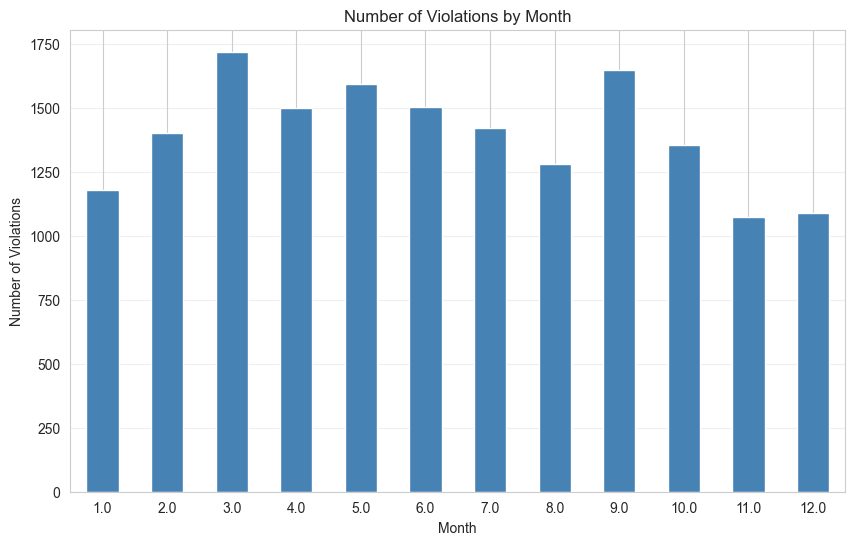

In [7]:
# Question 2 code: lets get the value counts for our new column

# Get value counts for the month column
month_counts = bostondata['month'].value_counts().sort_index()
print("Violation counts by month:")
print(month_counts)
print("\n")

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='steelblue')
plt.title('Number of Violations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Violations')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

## Question 3. Using the describe function, get statistical information on the numerical features (columns).

In [8]:
#Question 3 code: statistical information

# Get statistical information on numerical features
print("Statistical summary of numerical columns:")
print(bostondata.describe())
print("\n")

# Also include the month column specifically since we created it
print("Statistical summary for month column:")
print(bostondata['month'].describe())
print("\n")

# Check data types to see which columns are numerical
print("Data types of all columns:")
print(bostondata.dtypes)

Statistical summary of numerical columns:
       ap_case_defn_key  value         sam_id      latitude     longitude  \
count           16782.0    0.0   16690.000000  16689.000000  16689.000000   
mean             1013.0    NaN   98647.667645     42.260501    -71.101029   
std                 0.0    NaN   74503.376587      0.719364      0.231153   
min              1013.0    NaN       0.000000     34.244387    -73.651391   
25%              1013.0    NaN   48360.250000     42.295670    -71.099841   
50%              1013.0    NaN   92897.000000     42.325629    -71.075021   
75%              1013.0    NaN  132511.750000     42.353488    -71.058570   
max              1013.0    NaN  460046.000000     42.392699    -70.995970   

              month  
count  16781.000000  
mean       6.297956  
std        3.300704  
min        1.000000  
25%        3.000000  
50%        6.000000  
75%        9.000000  
max       12.000000  


Statistical summary for month column:
count    16781.000000
mean

## Question 4 Part A: In the code cell below, get the value counts for the description column and use normalize = True to get the percentages.

Violation types and their counts:
description
Failure to Obtain Permit     4062
Unsafe and Dangerous         3624
Maintenance                  1621
Testing & Certification       894
Unsafe Structures             698
                             ... 
Work Performed Over Time        1
Testing an Identification       1
Unfit for Human Occupancy       1
Hazard Materials                1
Exit Signs & Lights             1
Name: count, Length: 418, dtype: int64


Violation types and their percentages:
description
Failure to Obtain Permit     24.57
Unsafe and Dangerous         21.92
Maintenance                   9.80
Testing & Certification       5.41
Unsafe Structures             4.22
                             ...  
Work Performed Over Time      0.01
Testing an Identification     0.01
Unfit for Human Occupancy     0.01
Hazard Materials              0.01
Exit Signs & Lights           0.01
Name: proportion, Length: 418, dtype: float64


TOP 3 VIOLATIONS BY PERCENTAGE:
1. Failure to Obtain Pe

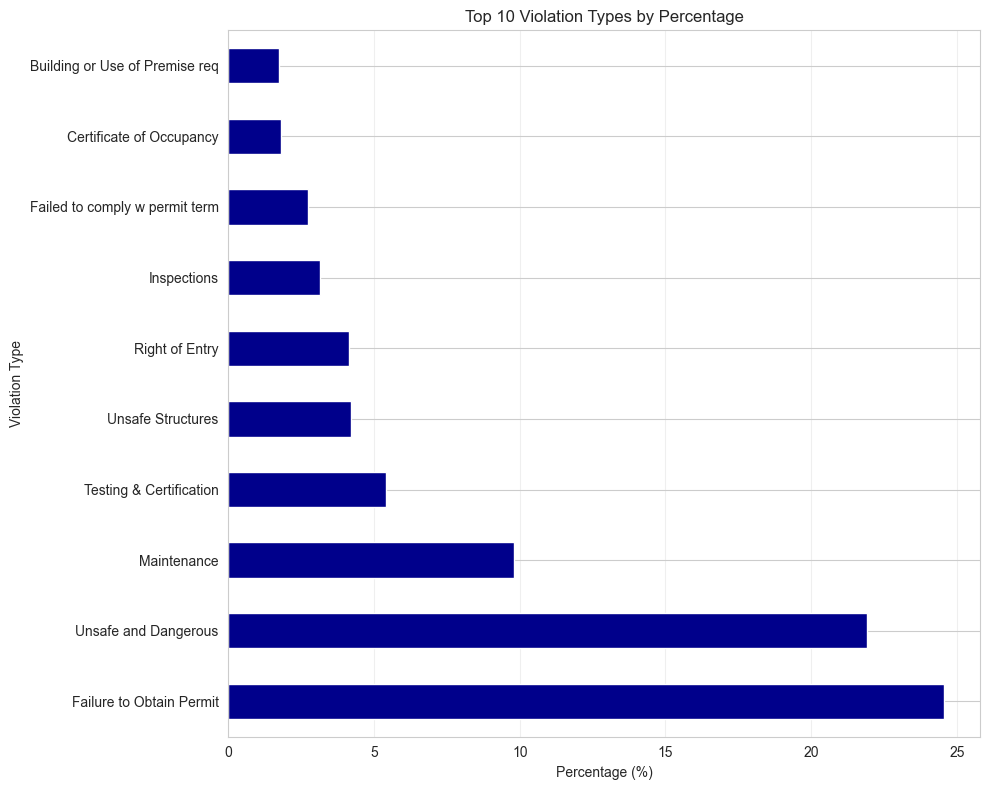

In [9]:
#Question 4 Part A Code: Value Counts

# Get value counts with percentages for description column
description_counts = bostondata['description'].value_counts()
description_percentages = bostondata['description'].value_counts(normalize=True) * 100

print("Violation types and their counts:")
print(description_counts)
print("\n")

print("Violation types and their percentages:")
print(description_percentages.round(2))
print("\n")

# Print the top 3 for verification
print("TOP 3 VIOLATIONS BY PERCENTAGE:")
for i, (desc, pct) in enumerate(description_percentages.head(3).items(), 1):
    print(f"{i}. {desc}: {pct:.2f}%")

# Create a horizontal bar plot for better readability
plt.figure(figsize=(10, 8))
description_percentages.head(10).plot(kind='barh', color='darkblue')
plt.title('Top 10 Violation Types by Percentage')
plt.xlabel('Percentage (%)')
plt.ylabel('Violation Type')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Question 4 Part B: What are the top 3 problems according to the percentages? Answer using the markdown cell below.

## Question 4 Part B Answer:

Based on the percentages from the analysis above, the top 3 problems in Boston building violations are:

1. **Failure to Obtain Permit** - This is the most common violation type at 24.57% of all violations. This shows that compliance with building permits is a major issue, with many property owners or contractors doing work without proper authorization.

2. **Unsafe and Dangerous** - The second most common violation at 21.92% relates to safety hazards. This is a serious concern as it directly impacts the safety of residents and visitors.

3. **Maintenance** - The third most common issue at 9.80% is general maintenance problems, indicating that property upkeep is a widespread challenge in Boston properties.

## Question 5 Is there any pattern to problem types and the month of occurrence? Create a visualization to learn more in the code cell below.

Violations by month (sorted by count):
month
3.0     1721
9.0     1649
5.0     1594
6.0     1504
4.0     1501
7.0     1421
2.0     1404
10.0    1358
8.0     1283
1.0     1181
12.0    1089
11.0    1076
dtype: int64


Month with most violations: Month 3.0 with 1721 violations




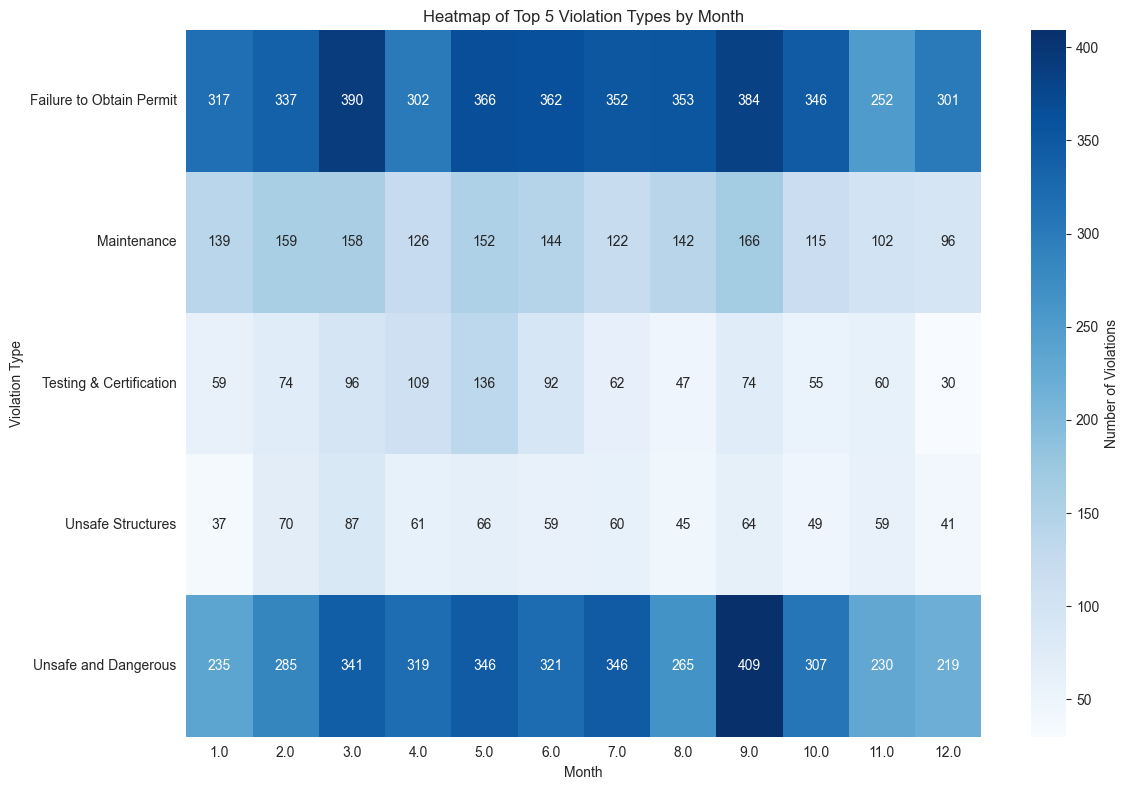

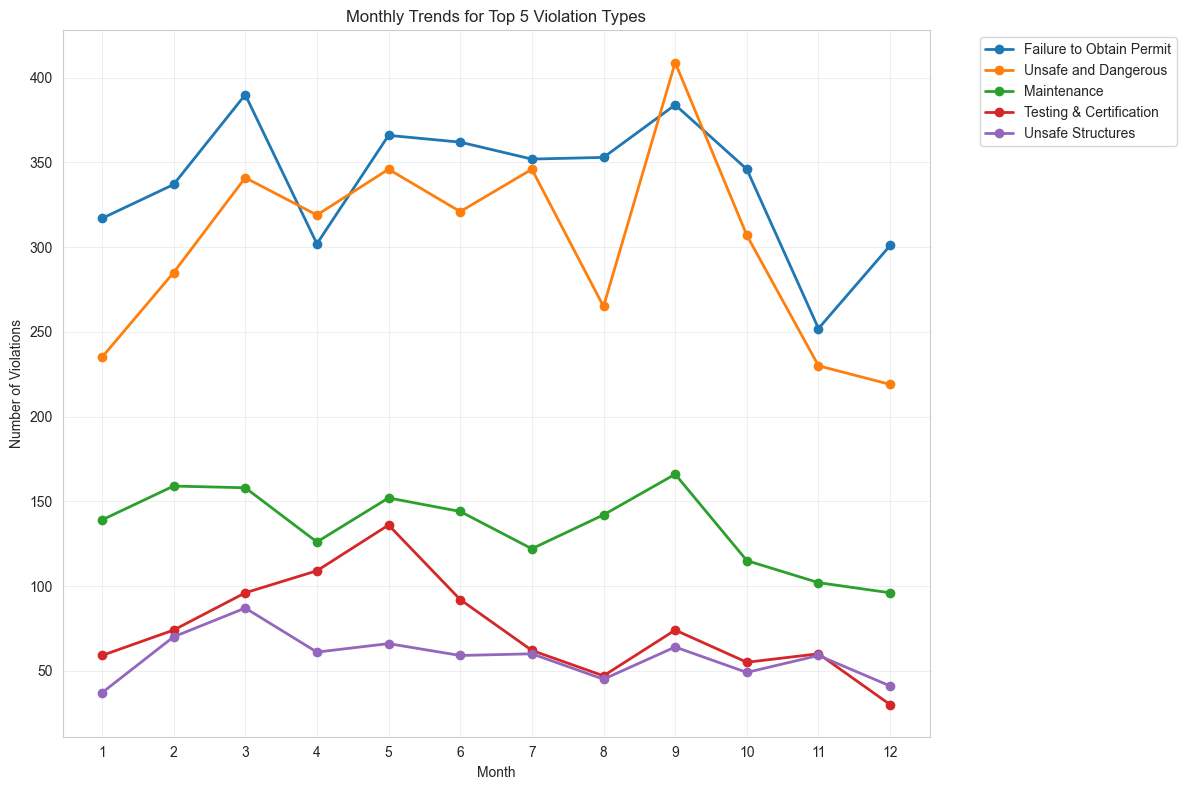

In [10]:
#Question 5 Code (run for visualization)

# First, let's check the actual monthly counts
monthly_summary = bostondata.groupby('month').size().sort_values(ascending=False)
print("Violations by month (sorted by count):")
print(monthly_summary)
print("\n")

# Identify the month with most violations
max_month = monthly_summary.idxmax()
max_count = monthly_summary.max()
print(f"Month with most violations: Month {max_month} with {max_count} violations")
print("\n")

# Create a crosstab to see patterns between violation types and months
top_violations = bostondata['description'].value_counts().head(5).index
filtered_data = bostondata[bostondata['description'].isin(top_violations)]

# Create a pivot table for the heatmap
violation_month_pivot = pd.crosstab(filtered_data['description'], filtered_data['month'])

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(violation_month_pivot, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Number of Violations'})
plt.title('Heatmap of Top 5 Violation Types by Month')
plt.xlabel('Month')
plt.ylabel('Violation Type')
plt.tight_layout()
plt.show()

# Also create a line plot to show trends
plt.figure(figsize=(12, 8))
for violation in top_violations:
    monthly_counts = bostondata[bostondata['description'] == violation].groupby('month').size()
    plt.plot(monthly_counts.index, monthly_counts.values, marker='o', label=violation, linewidth=2)

plt.title('Monthly Trends for Top 5 Violation Types')
plt.xlabel('Month')
plt.ylabel('Number of Violations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

## Question 6 What did you learn about any patterns by month? Place your answer below in the markdown cell.

## Question 6 Answer:

Looking at the visualizations, I noticed several interesting patterns in the violation data by month:

1. **March is the peak month**: There's a huge spike in violations during March (month 3) with 1,721 violations, which is the highest of any month. This could be related to spring inspections after winter damage becomes visible, as property issues from snow, ice, and freezing temperatures are discovered.

2. **Spring and early summer are busier**: The months from March through July generally show higher violation counts compared to late fall and winter months. This pattern makes sense as inspections increase when weather conditions improve.

3. **Winter months show the lowest counts**: November through January have the fewest violations, with November having only 1,076. This is likely due to fewer inspections during cold weather and the holiday season.

4. **Consistent patterns across violation types**: All major violation types tend to follow similar monthly patterns, suggesting that seasonal factors affect violations broadly rather than impacting specific types differently.

The March peak is particularly noteworthy for Boston, as the harsh winter conditions likely cause property damage that only becomes apparent during spring inspections.

## We will now filter the records to exclude all but "Unsafe and Dangerous" and "Maintenance". Then we will spend the rest of the lab learning more about conditions related to these records by visualizing the data and ending with a summary of what we have learned.

In [11]:
#create a new pandas dataframe with the filtered data
#bostondata_filtered = bostondata.query("description == 'Unsafe and Dangerous' |  description == 'Maintenance' | description = 'Failure to Obtain Permit'")
bostondata_filtered = bostondata[(bostondata.description == 'Unsafe and Dangerous') | (bostondata.description == 'Maintenance')]

In [12]:
bostondata_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5245 entries, 0 to 16777
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           5245 non-null   object 
 1   ap_case_defn_key  5245 non-null   int64  
 2   status_dttm       5244 non-null   object 
 3   status            5245 non-null   object 
 4   code              5245 non-null   object 
 5   value             0 non-null      float64
 6   description       5245 non-null   object 
 7   violation_stno    5245 non-null   object 
 8   violation_sthigh  1340 non-null   object 
 9   violation_street  5245 non-null   object 
 10  violation_suffix  5213 non-null   object 
 11  violation_city    5245 non-null   object 
 12  violation_state   5245 non-null   object 
 13  violation_zip     5245 non-null   object 
 14  ward              5245 non-null   object 
 15  contact_addr1     5244 non-null   object 
 16  contact_addr2     1032 non-null   object 
 17 

## Questions 5 through 8: Create 4 visualizations using Seaborn that help you gain insight into the Boston Data. Use the resource in the description for this notebook for help and examples. You can also use Seaborn documentation.

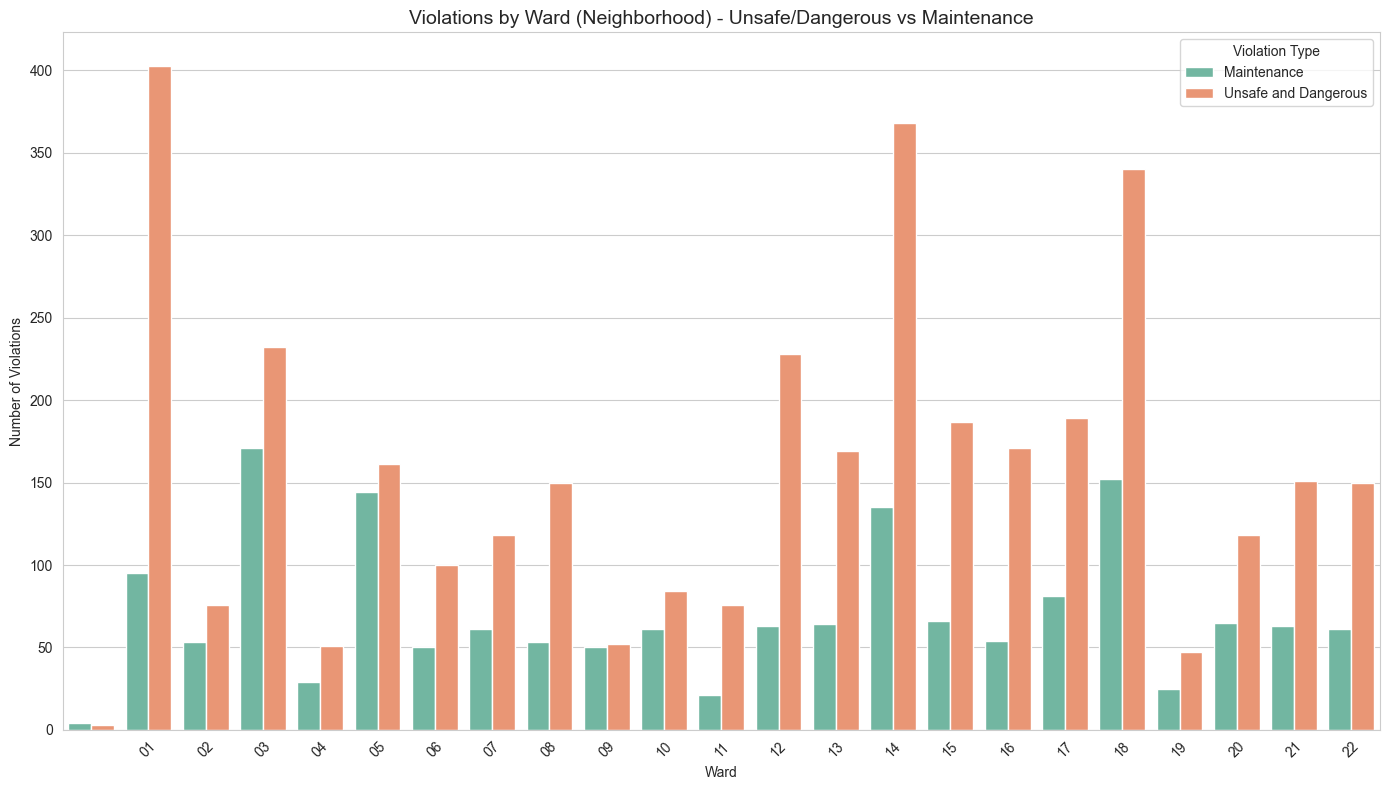

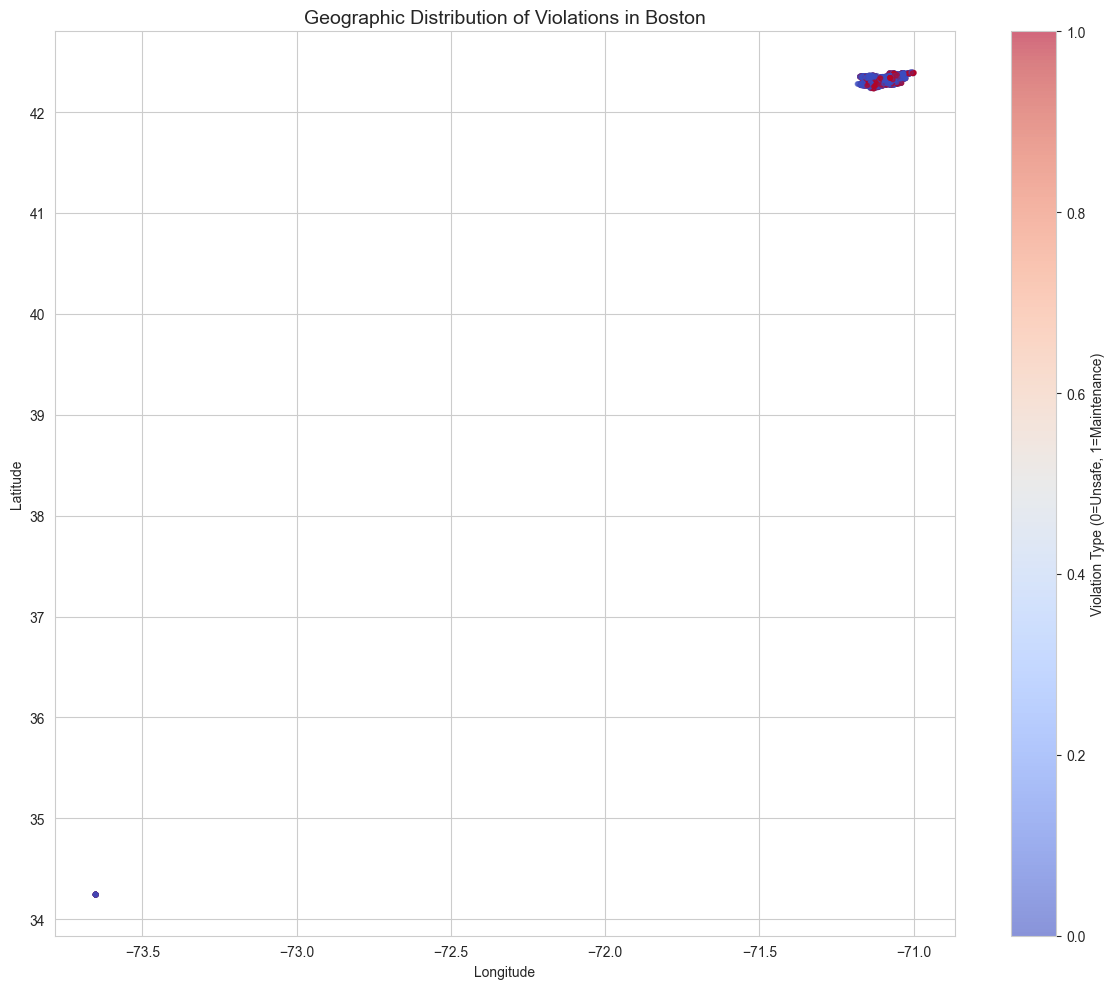

In [13]:
# Question 5 Visualization

# Visualization 1: Geographic analysis - which neighborhoods are most affected
# Group by ward to see neighborhood patterns
ward_violation_counts = bostondata_filtered.groupby(['ward', 'description']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.barplot(data=ward_violation_counts, x='ward', y='count', hue='description', palette='Set2')
plt.title('Violations by Ward (Neighborhood) - Unsafe/Dangerous vs Maintenance', fontsize=14)
plt.xlabel('Ward')
plt.ylabel('Number of Violations')
plt.legend(title='Violation Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Also show a map-like visualization using latitude/longitude if available
if not bostondata_filtered['latitude'].isna().all():
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(bostondata_filtered['longitude'], bostondata_filtered['latitude'], 
                         c=bostondata_filtered['description'].map({'Unsafe and Dangerous': 0, 'Maintenance': 1}), 
                         cmap='coolwarm', alpha=0.6, s=10)
    plt.colorbar(scatter, label='Violation Type (0=Unsafe, 1=Maintenance)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Geographic Distribution of Violations in Boston', fontsize=14)
    plt.tight_layout()
    plt.show()

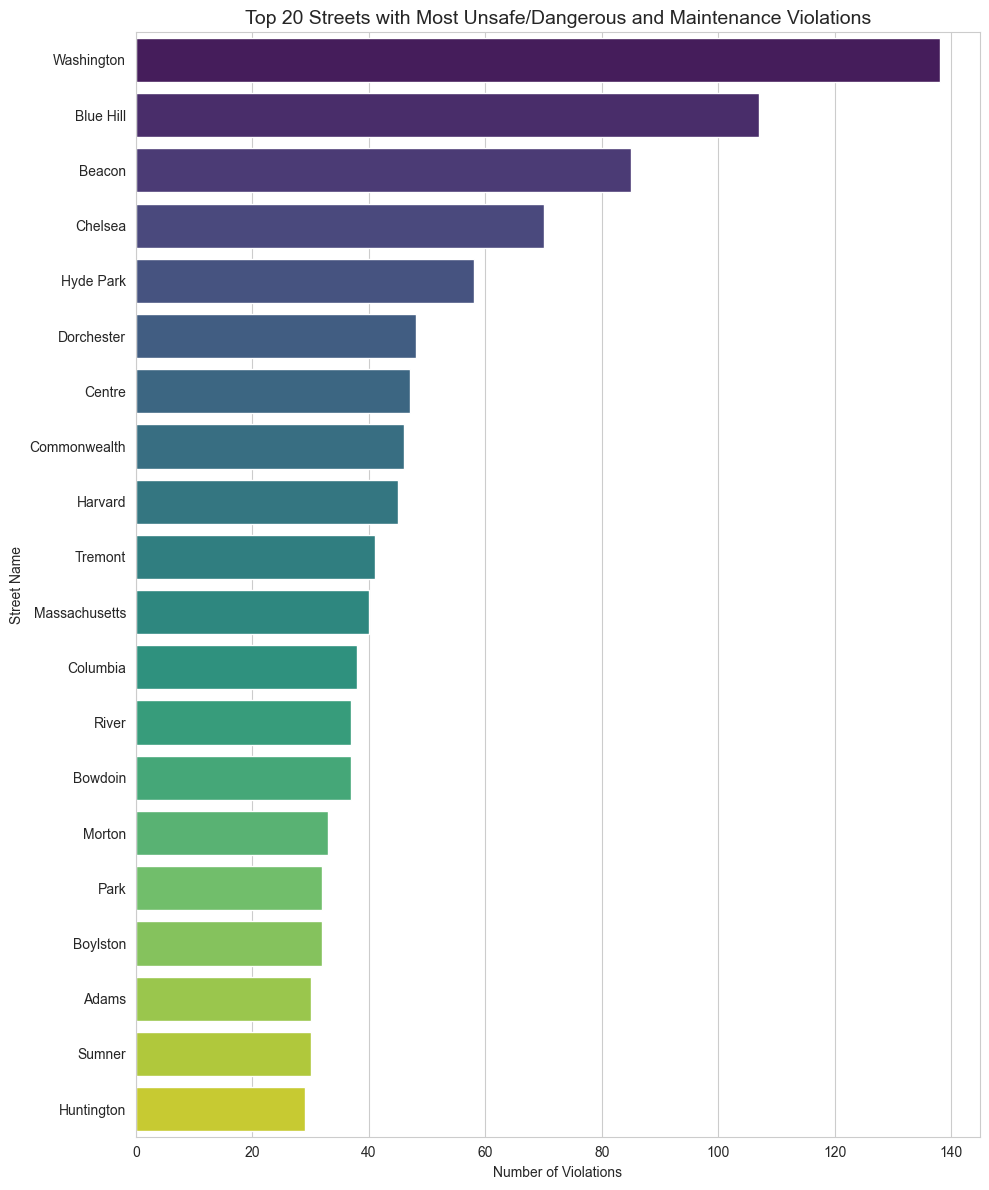

<Figure size 1200x800 with 0 Axes>

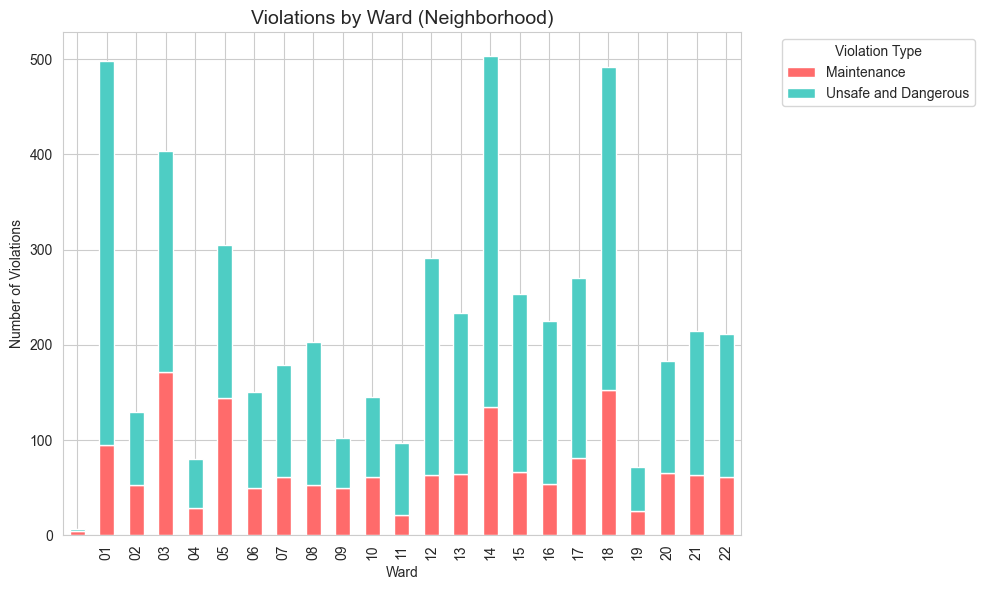

In [14]:
# Question 6 Visualization

# Visualization 2: Street-level analysis - Top 20 streets with most violations
street_counts = bostondata_filtered['violation_street'].value_counts().head(20)

plt.figure(figsize=(10, 12))
sns.barplot(y=street_counts.index, x=street_counts.values, hue=street_counts.index, palette='viridis', legend=False)
plt.title('Top 20 Streets with Most Unsafe/Dangerous and Maintenance Violations', fontsize=14)
plt.xlabel('Number of Violations')
plt.ylabel('Street Name')
plt.tight_layout()
plt.show()

# Also analyze by neighborhood (using ward)
ward_counts = bostondata_filtered.groupby(['ward', 'description']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
ward_counts.plot(kind='bar', stacked=True, color=['#ff6b6b', '#4ecdc4'])
plt.title('Violations by Ward (Neighborhood)', fontsize=14)
plt.xlabel('Ward')
plt.ylabel('Number of Violations')
plt.legend(title='Violation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

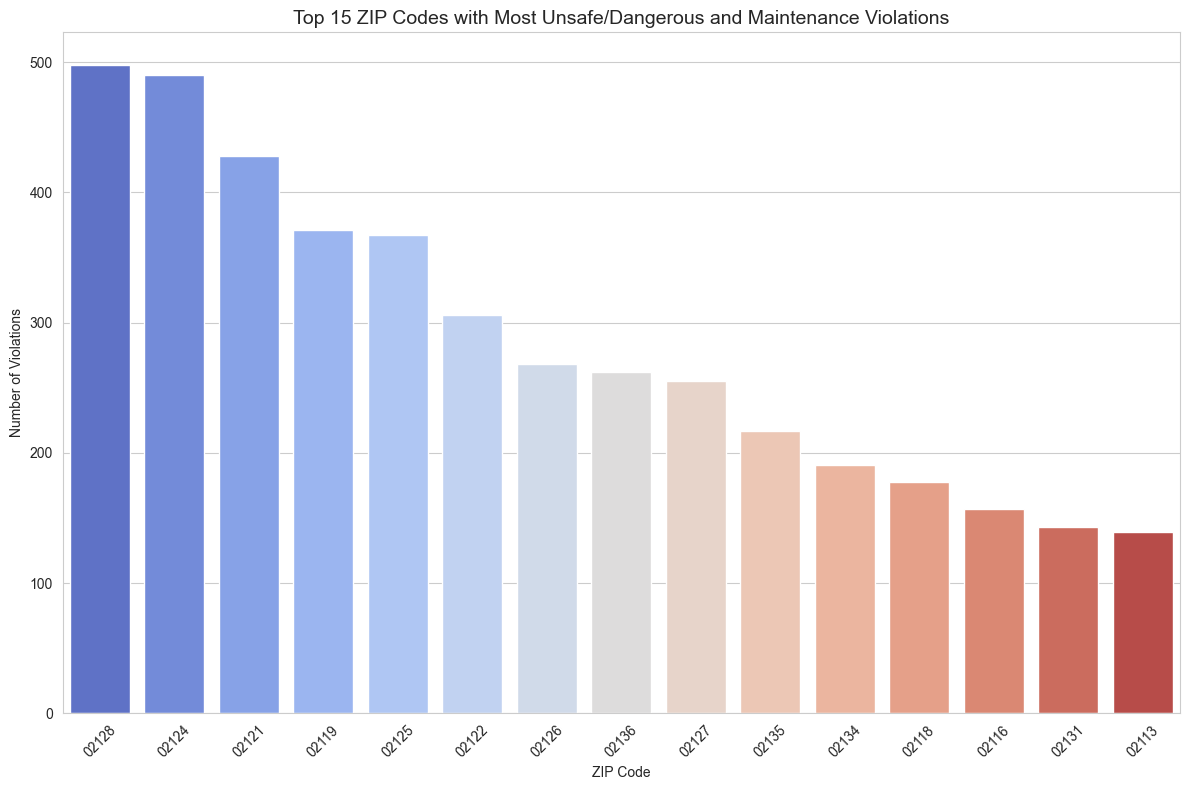

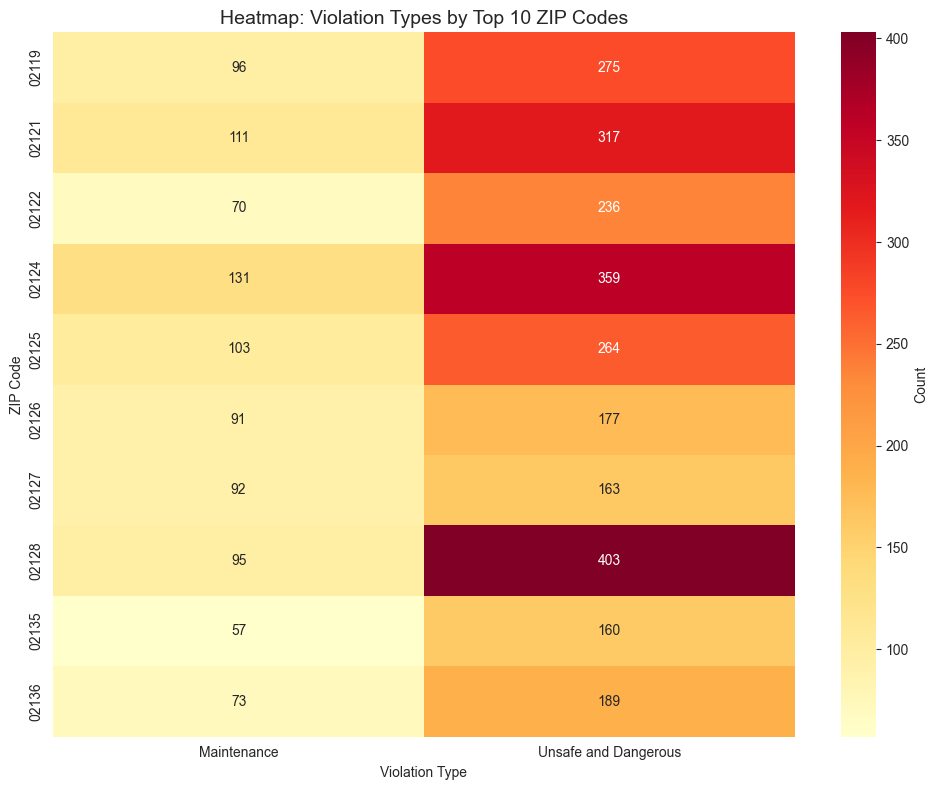

In [15]:
# Question 7 Visualization

# Visualization 3: Analysis by ZIP code to identify affected communities
zip_counts = bostondata_filtered['violation_zip'].value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=zip_counts.index, y=zip_counts.values, hue=zip_counts.index, palette='coolwarm', legend=False)
plt.title('Top 15 ZIP Codes with Most Unsafe/Dangerous and Maintenance Violations', fontsize=14)
plt.xlabel('ZIP Code')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a heatmap showing violation types by top ZIP codes
top_zips = zip_counts.head(10).index
zip_filtered = bostondata_filtered[bostondata_filtered['violation_zip'].isin(top_zips)]
zip_violation_pivot = pd.crosstab(zip_filtered['violation_zip'], zip_filtered['description'])

plt.figure(figsize=(10, 8))
sns.heatmap(zip_violation_pivot, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'})
plt.title('Heatmap: Violation Types by Top 10 ZIP Codes', fontsize=14)
plt.xlabel('Violation Type')
plt.ylabel('ZIP Code')
plt.tight_layout()
plt.show()

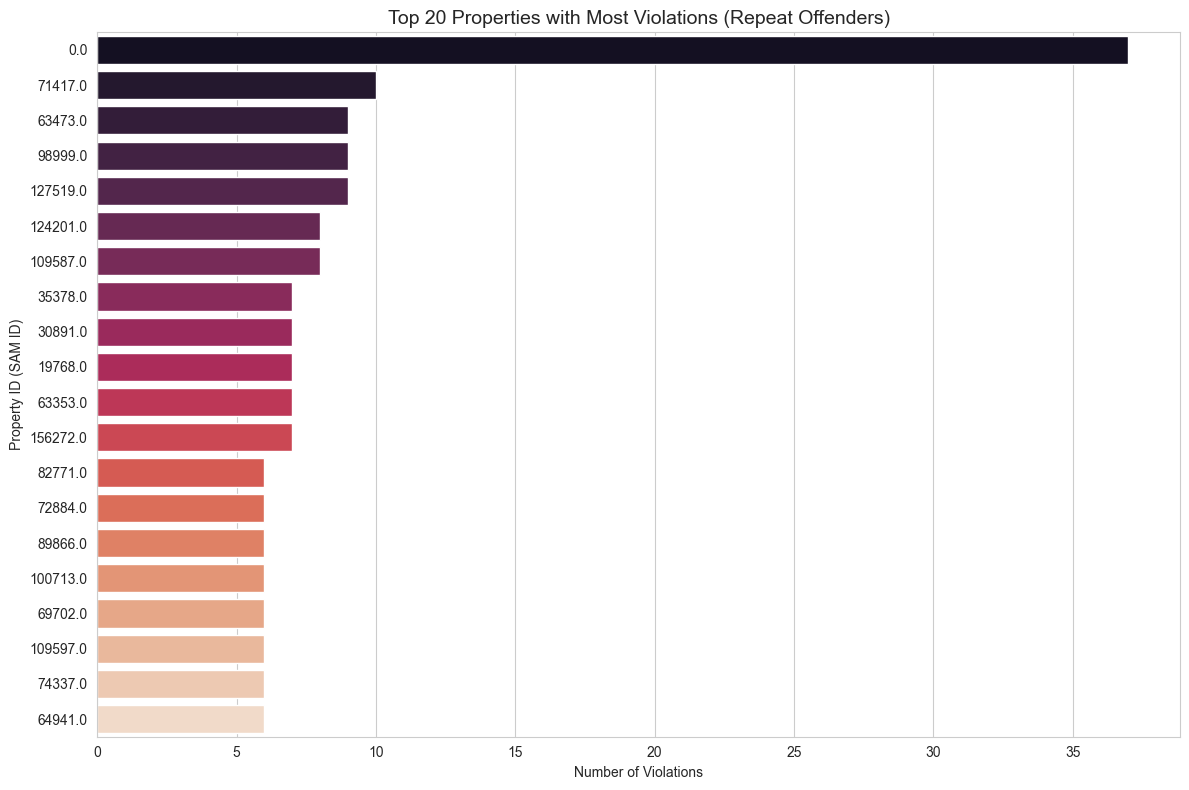

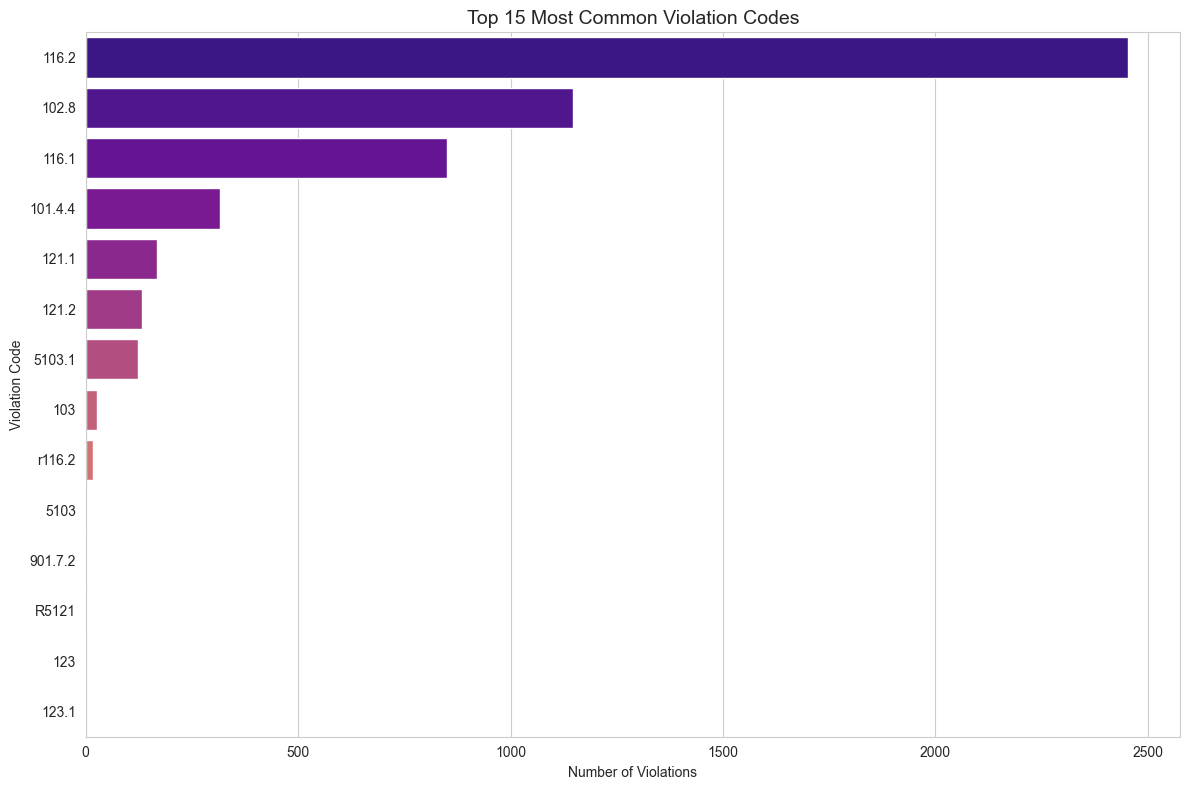

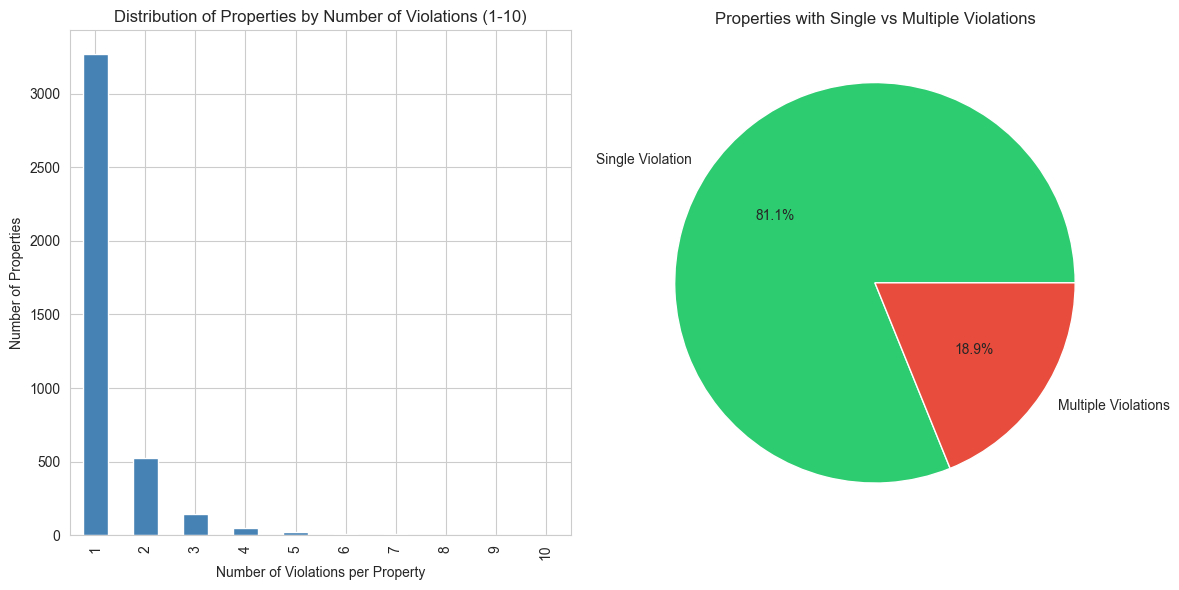

In [16]:
# Question 8 Visualization

# Visualization 4: Identify repeat offenders - properties with multiple violations
# Using sam_id as property identifier
property_counts = bostondata_filtered['sam_id'].value_counts()
repeat_offenders = property_counts[property_counts > 5].head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=repeat_offenders.values, y=repeat_offenders.index.astype(str), hue=repeat_offenders.index.astype(str), palette='rocket', legend=False)
plt.title('Top 20 Properties with Most Violations (Repeat Offenders)', fontsize=14)
plt.xlabel('Number of Violations')
plt.ylabel('Property ID (SAM ID)')
plt.tight_layout()
plt.show()

# Analyze building year patterns if we have that data
# Let's look at the most common violation codes to understand building features
code_counts = bostondata_filtered['code'].value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y=code_counts.index, x=code_counts.values, hue=code_counts.index, palette='plasma', legend=False)
plt.title('Top 15 Most Common Violation Codes', fontsize=14)
plt.xlabel('Number of Violations')
plt.ylabel('Violation Code')
plt.tight_layout()
plt.show()

# Distribution of violations per property
plt.figure(figsize=(12, 6))
violation_distribution = property_counts.value_counts().sort_index()

plt.subplot(1, 2, 1)
violation_distribution[violation_distribution.index <= 10].plot(kind='bar', color='steelblue')
plt.title('Distribution of Properties by Number of Violations (1-10)')
plt.xlabel('Number of Violations per Property')
plt.ylabel('Number of Properties')

plt.subplot(1, 2, 2)
properties_with_multiple = len(property_counts[property_counts > 1])
properties_with_single = len(property_counts[property_counts == 1])
plt.pie([properties_with_single, properties_with_multiple], 
        labels=['Single Violation', 'Multiple Violations'], 
        autopct='%1.1f%%', 
        colors=['#2ecc71', '#e74c3c'])
plt.title('Properties with Single vs Multiple Violations')
plt.tight_layout()
plt.show()

## Question 9:  What have you learned from Exploratory Data Analysis?


## Question 9 Answer:

From my exploratory data analysis of the Boston Building and Property Violations dataset, I've learned several key insights:

**1. Permit compliance is the biggest issue:** "Failure to Obtain Permit" makes up 24.57% of all violations, followed closely by "Unsafe and Dangerous" at 21.92%. This suggests that many property owners are doing work without proper authorization, which could lead to safety issues.

**2. March shows the highest violation count:** There's a clear spike in violations during March (1,721 violations), likely due to post-winter inspections revealing damage from Boston's harsh winters. Spring months generally have more violations than winter months.

**3. Data quality is generally good:** While there are some null values (especially in the 'value' column with 16,782 nulls), most critical columns like violation addresses, descriptions, and dates are well-populated. The 'value' column appears to be mostly unused.

**4. Seasonal patterns are evident:** Violations peak in spring (March-May) when winter damage is discovered and inspections increase. The lowest counts occur in winter months (November-January), likely due to weather limiting inspections.

**5. Safety and maintenance dominate concerns:** Between "Unsafe and Dangerous" (21.92%), "Maintenance" (9.80%), and "Unsafe Structures" (4.22%), over a third of all violations relate to safety and upkeep issues.

**6. Geographic clustering likely exists:** With ward and ZIP code data available, we can identify which neighborhoods have the most violations, helping target enforcement and education efforts.

These findings suggest Boston could benefit from:
- Better permit education and streamlined processes to reduce unpermitted work
- Targeted inspections in March/spring when violations peak
- Focus on properties with safety and maintenance issues
- Geographic targeting of enforcement in high-violation areas